In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-card-customer-churn-prediction


In [5]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.drop(columns =['RowNumber' , 'CustomerId' , 'Surname'] , inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography' , 'Gender'], drop_first=True)

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [19]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [81]:
model = Sequential()

model.add(Dense(11, activation='relu',input_dim = 11))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(loss='binary_crossentropy' , optimizer = 'Adam', metrics=['accuracy'])

In [84]:
history = model.fit(X_train_scaled , y_train , epochs=100, validation_split =0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6749 - loss: 0.6023 - val_accuracy: 0.8050 - val_loss: 0.4950
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4902 - val_accuracy: 0.8081 - val_loss: 0.4489
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8095 - loss: 0.4501 - val_accuracy: 0.8125 - val_loss: 0.4331
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4195 - val_accuracy: 0.8188 - val_loss: 0.4242
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8224 - loss: 0.4174 - val_accuracy: 0.8250 - val_loss: 0.4158
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4045 - val_accuracy: 0.8313 - val_loss: 0.4033
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.3944 - val_accuracy: 0.8394 - val_loss: 0.3900
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8450 - loss: 0.3817 - val_accu

In [85]:
model.layers[0].get_weights()

[array([[ 0.02204824, -0.01484715,  0.03037535, -0.25577602, -0.16553056,
          0.15804075,  0.22930011,  0.18114954,  0.25167304,  0.04917164,
         -0.34667206],
        [ 0.07279813, -0.7752931 , -0.73417944,  0.7483104 ,  0.12115236,
         -1.0775057 , -0.34345728, -0.12186655,  0.36968255,  0.35058156,
          0.43332934],
        [ 0.16930863, -0.14467548,  0.03713872,  0.2815362 , -0.04153132,
         -0.11436017,  0.03033619,  0.19811523, -0.3574848 , -0.18766168,
         -0.14445673],
        [ 0.71505487,  0.10893431, -0.42688838,  0.04451854,  0.8535387 ,
          0.40711427, -0.25962147,  0.05720722, -0.12804347, -0.0604472 ,
          0.17610048],
        [ 0.01975484, -0.02985131,  0.04314537,  1.1586092 ,  1.09736   ,
          0.1599915 ,  0.5672371 ,  0.77494675,  1.115353  , -0.7132972 ,
         -0.05284987],
        [ 0.1707713 , -0.0832763 ,  0.17467457,  0.01490627,  0.00986688,
         -0.11336157, -0.18531585, -0.30352116,  0.13657725, -0.0810054

In [86]:
model.layers[1].get_weights()

[array([[-0.34696048,  0.5807711 ,  0.16092794, -0.58361983, -0.41069132,
          0.30536634],
        [-0.66274834,  0.3967707 ,  0.4818702 ,  0.01378645, -0.05006253,
         -0.66314024],
        [ 0.19405583,  0.4439034 , -0.06817977,  0.26290634, -0.30013332,
         -0.21372043],
        [ 0.2984217 ,  0.25328416,  0.71260977, -0.00603576,  0.28918067,
         -0.32262674],
        [ 0.72486174, -0.6536896 , -0.33361027, -0.04380587,  0.514989  ,
          0.20250387],
        [-0.69186556, -0.33231223, -0.09994759, -0.30908367,  0.09126122,
         -1.0537618 ],
        [ 0.03417724, -0.08357515,  0.48173857, -0.59151757, -0.21399419,
         -0.25607383],
        [ 0.35198545,  0.24741401, -0.21988337, -0.04030192,  0.4545985 ,
          0.62412494],
        [ 0.55325955,  0.00142751,  0.75355947, -1.1652895 ,  0.28276452,
          0.33201236],
        [-0.15970683, -0.52702665, -0.11510264, -0.0480625 , -1.217178  ,
          0.81568605],
        [-0.9215044 ,  0.22824

In [87]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8595

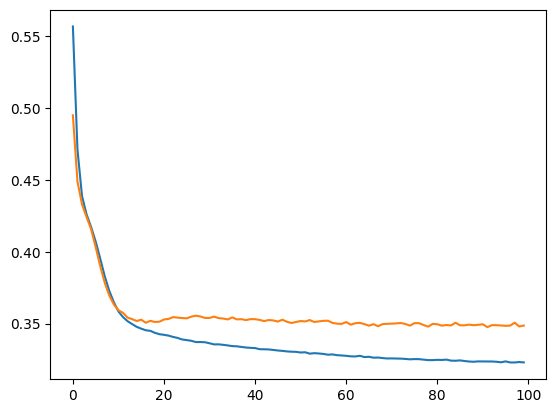

In [92]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

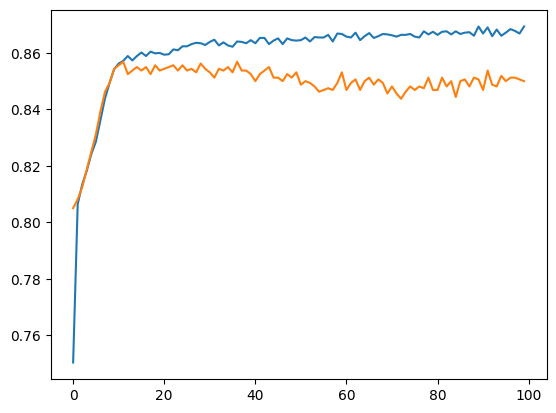

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])